## Monitoring a MITgcm simulation

While running an expensive simulation, you want to check that everything looks right.
Using mkg/monitor writes statistics on various model variables into the log file.
I keep the log file (in my case STDOUT.0000) for each job and rename with the job number as suffix (e.g. STDOUT.0000.1). This notebook shows how to use the logs to plots some sanity checks on the simulation.

In [1]:
import pandas as pd
import glob
import subprocess as sp
import datetime as dt
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as mdates

%matplotlib inline

In [2]:
dirlogs='/local/data/artemis/workspace/rdussin/ASTE/RUNS/tmpdir_ASTE-CORE2+CFC-Run01/'

In [7]:
# make monitoring file
def make_monitor_file(dirlogs):
    ''' create a csv file with content from monitor package that
    pandas can read '''
    filenames = glob.glob(dirlogs + 'STDOUT.0000')
    sp.call('rm monitor.log',shell=True)
    for filename in filenames:
        sp.call("cat " + filename + " | grep %MON | awk '{print $4,$6}' >> monitor.log",shell=True)

make_monitor_file(dirlogs)

In [8]:
# read monitor.log file into pandas
monitoring = pd.read_csv('monitor.log',sep=' ',names=['gcmvariable','gcmvalue'])

In [14]:
# create the time axis
# start date can be found in STDOUT looking for startdate
timesteps = monitoring[monitoring.gcmvariable=='time_tsnumber'].gcmvalue.values
seconds_from = monitoring[monitoring.gcmvariable=='time_secondsf'].gcmvalue.values

dates= []
for kt in np.arange(len(seconds_from)):
    dates.append(dt.datetime(1948,1,1,0,0) + dt.timedelta(seconds=seconds_from[kt]))

In [15]:
# print list of available diagnostics
list_available_diags = set(monitoring.gcmvariable.values)
print(list_available_diags)

{'dynstat_wvel_del2', 'dynstat_vvel_min', 'exf_vstress_min', 'exf_precip_max', 'trcstat_ptracer02_max', 'seaice_uice_mean', 'seaice_heff_min', 'dynstat_uvel_del2', 'RAW_sd', 'obc_E_uVel_Int', 'AngleCS_min', 'dynstat_uvel_max', 'exf_atemp_mean', 'exf_swdown_del2', 'DYF_max', 'DXG_sd', 'exf_lwflux_del2', 'exf_lwdown_max', 'forcing_fu_min', 'dynstat_theta_mean', 'trcstat_ptracer02_sd', 'exf_wspeed_del2', 'vort_r_min', 'trcstat_ptracer02_min', 'fCoriG_min', 'DXC_min', 'trcstat_ptracer02_mean', 'XC_mean', 'DYU_sd', 'exf_atemp_del2', 'exf_swflux_sd', 'trcstat_ptracer01_mean', 'exf_runoff_max', 'DXV_mean', 'RAS_max', 'forcing_qsw_max', 'advcfl_wvel_max', 'obc_E_theta_mean', 'AngleSN_mean', 'RAZ_sd', 'exf_tsnumber', 'exf_vwind_mean', 'dynstat_uvel_mean', 'AngleCS_mean', 'seaice_area_del2', 'YG_max', 'RAS_sd', 'exf_vstress_max', 'DXC_max', 'exf_uwind_mean', 'exf_evap_sd', 'dynstat_sss_min', 'seaice_area_max', 'exf_vstress_mean', 'dynstat_theta_min', 'exf_aqh_mean', 'dynstat_theta_max', 'dynstat

In [18]:
# monitoring plot
def plot_statistics_of(cvar):
    ''' plots min/max/mean timeseries,
    takes variable without suffix as string (e.g. dynstat_sst)'''
    meanvar = monitoring[monitoring.gcmvariable==cvar+'_mean'].gcmvalue.values
    minvar  = monitoring[monitoring.gcmvariable==cvar+'_min' ].gcmvalue.values
    maxvar  = monitoring[monitoring.gcmvariable==cvar+'_max' ].gcmvalue.values
    
    fig = plt.figure(figsize=[12,8])

    plt.subplot(121)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    #plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
    #plt.gca().xaxis.set_minor_locator(mdates.DayLocator())
    plt.fill_between(dates,minvar,maxvar,color='grey')
    plt.plot(dates,meanvar,'r.')
    plt.title('range and mean '+cvar)
    plt.gcf().autofmt_xdate()

    plt.subplot(122)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    #plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
    #plt.gca().xaxis.set_minor_locator(mdates.DayLocator())
    plt.plot(dates,meanvar,'r.')
    plt.title('zoom on mean '+cvar)
    plt.gcf().autofmt_xdate()
    plt.show()
    
    

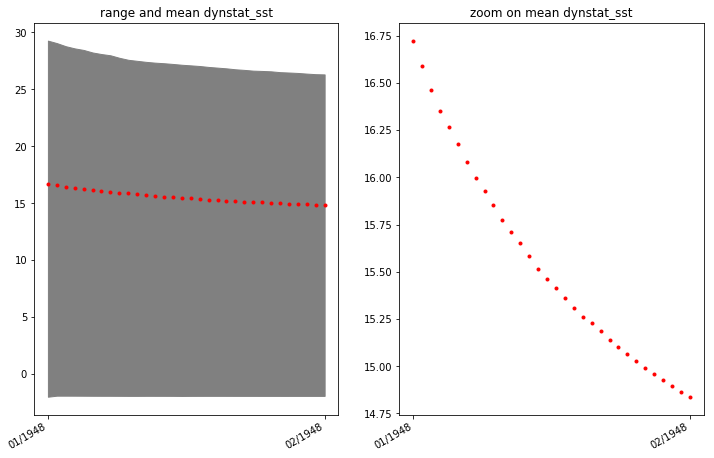

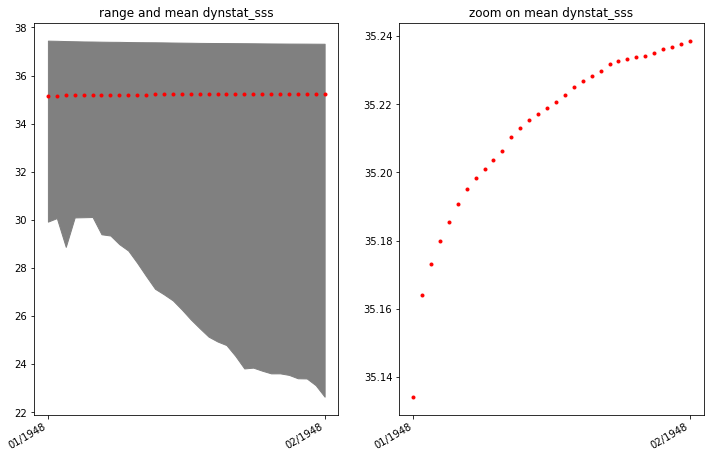

In [19]:
# surface T/S statistics
plot_statistics_of('dynstat_sst')
plot_statistics_of('dynstat_sss')

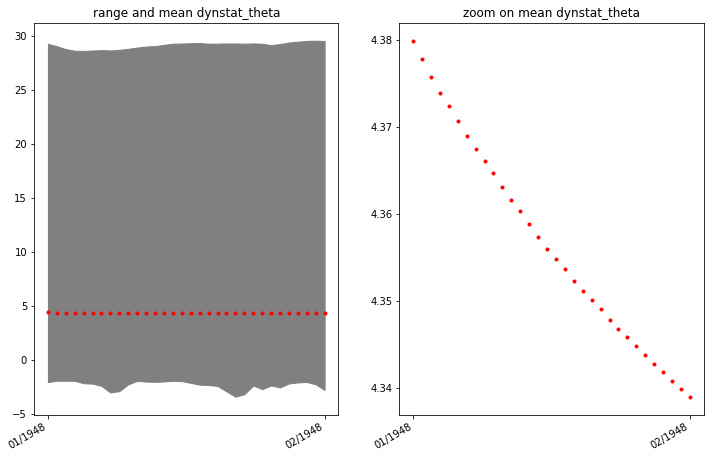

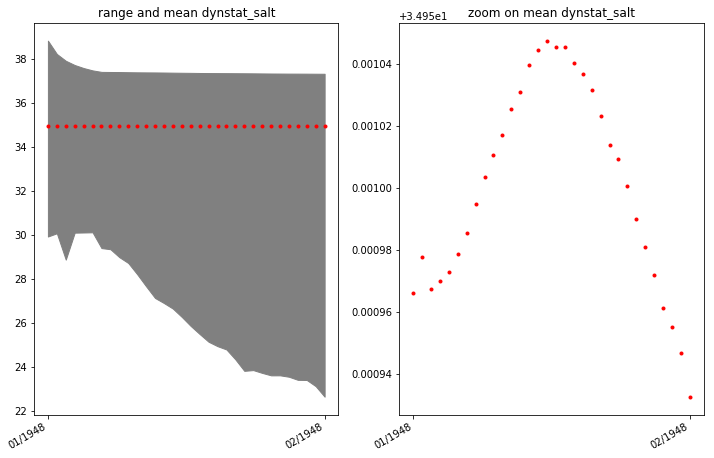

In [20]:
# Volume T/S
plot_statistics_of('dynstat_theta')
plot_statistics_of('dynstat_salt')

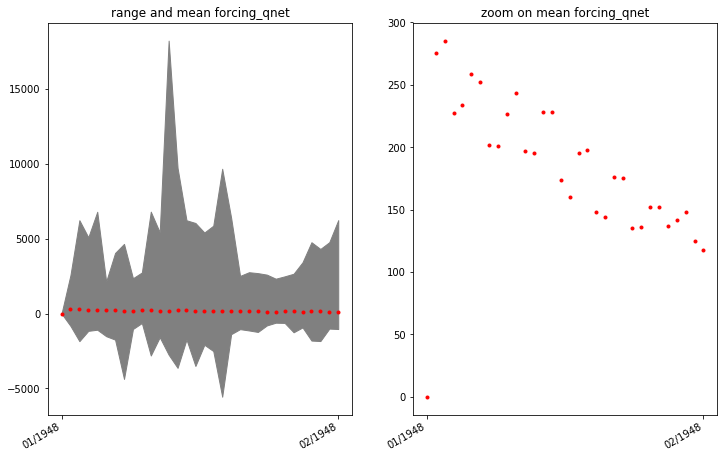

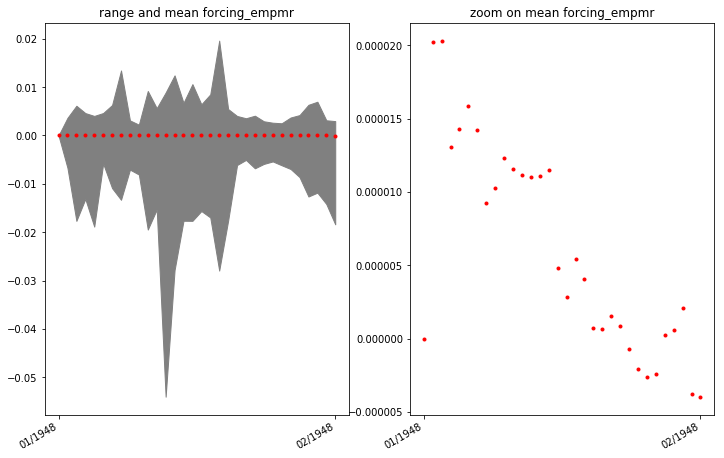

In [21]:
# Atmospheric forcing statistics
plot_statistics_of('forcing_qnet')
plot_statistics_of('forcing_empmr')

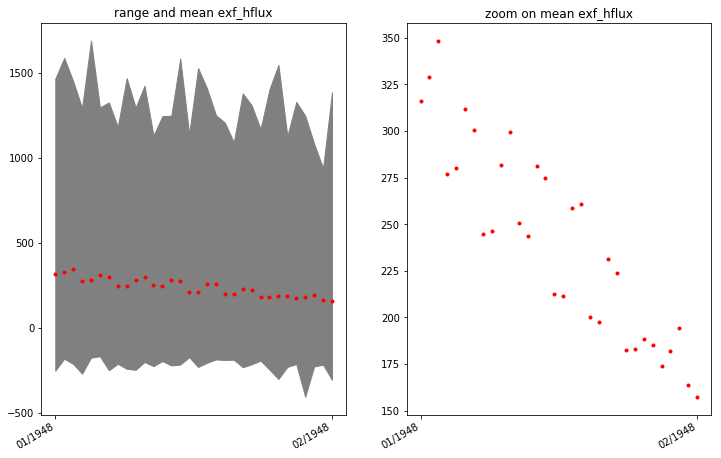

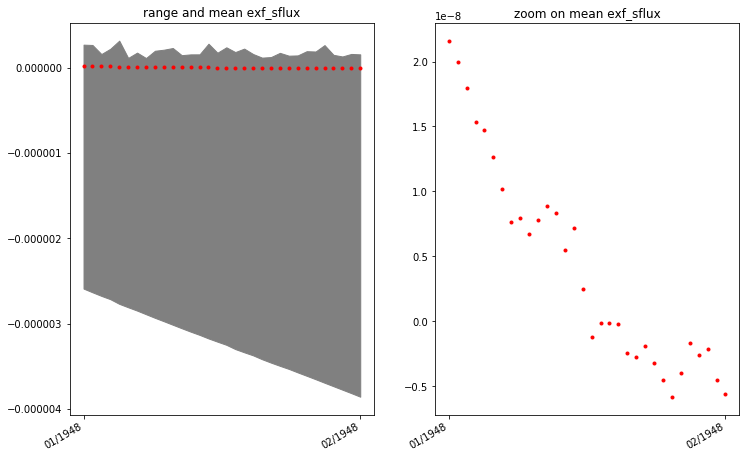

In [42]:
plot_statistics_of('exf_hflux')
plot_statistics_of('exf_sflux')



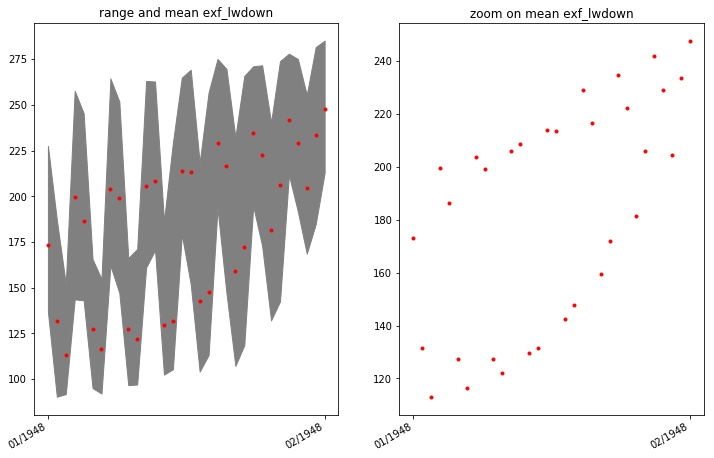

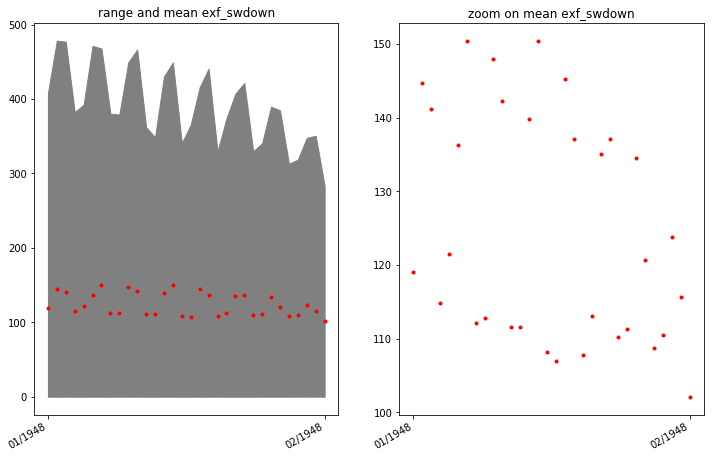

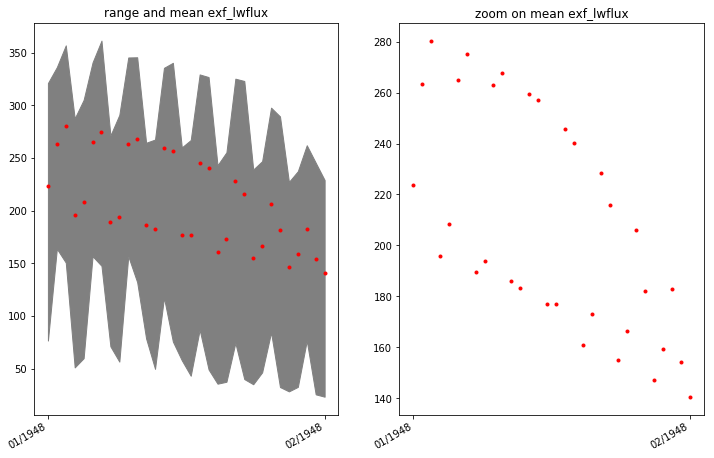

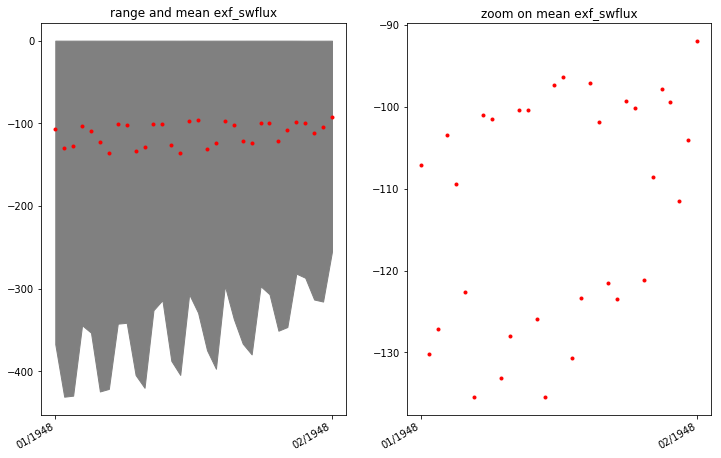

In [40]:
plot_statistics_of('exf_lwdown')
plot_statistics_of('exf_swdown')

plot_statistics_of('exf_lwflux')
plot_statistics_of('exf_swflux')

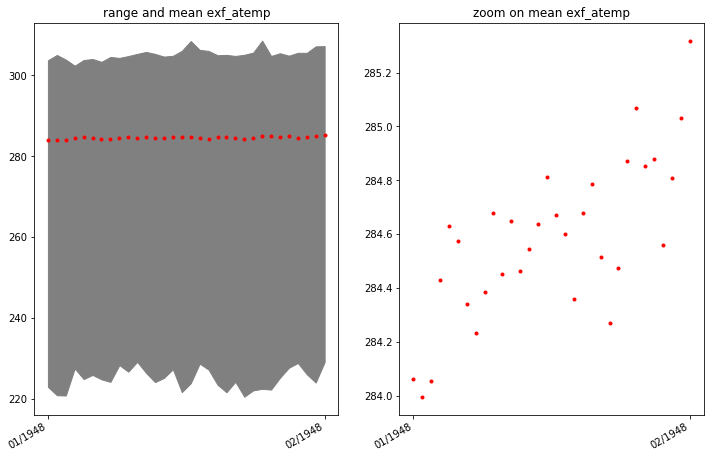

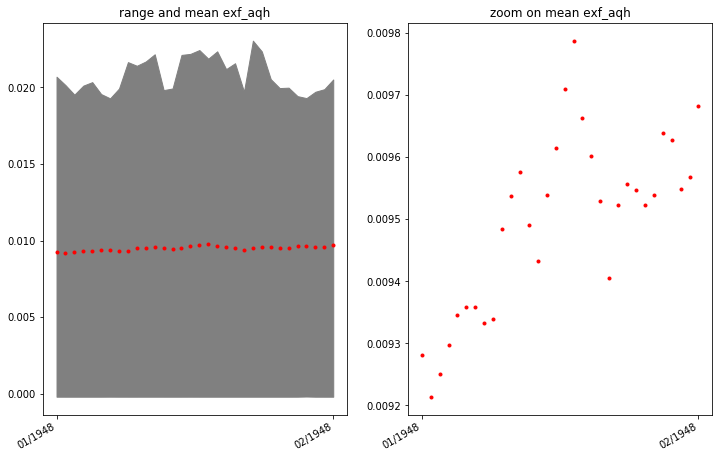

In [41]:
plot_statistics_of('exf_atemp')
plot_statistics_of('exf_aqh')